In [1]:
import torch as tch
from torch import autograd as agd
import torch.nn as tchnn
import torch.nn.functional as F
import torch.optim as optm
from torchvision import transforms, utils
import torchvision
import os
import struct
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
a1 = tch.Tensor(6,6)
print(a1)


-1.1848e-26  4.5723e-41 -1.1848e-26  4.5723e-41  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  1.6255e-43  1.1351e-43  0.0000e+00 -1.1848e-26  4.5723e-41
-9.3544e+23  3.0644e-41 -9.6731e+23  3.0644e-41  6.8664e-44  0.0000e+00
[torch.FloatTensor of size 6x6]



In [9]:
a2 = tch.rand(6,6)
print(a2)


 0.5872  0.0279  0.2313  0.7905  0.6577  0.2489
 0.2529  0.5860  0.6877  0.0157  0.0138  0.8735
 0.3973  0.4544  0.8631  0.1011  0.8682  0.9558
 0.8635  0.8142  0.7106  0.5953  0.2627  0.2349
 0.5930  0.7063  0.4601  0.6565  0.9937  0.9896
 0.0301  0.0464  0.7377  0.4010  0.6787  0.2290
[torch.FloatTensor of size 6x6]



In [10]:
a1+a2


 5.8718e-01  2.7909e-02  2.3126e-01  7.9054e-01  6.5769e-01  2.4894e-01
 2.5286e-01  5.8600e-01  6.8771e-01  1.5668e-02  1.3766e-02  8.7353e-01
 3.9733e-01  4.5444e-01  8.6311e-01  1.0108e-01  8.6817e-01  9.5584e-01
 8.6352e-01  8.1424e-01  7.1055e-01  5.9526e-01  2.6272e-01  2.3491e-01
 5.9304e-01  7.0627e-01  4.6010e-01  6.5651e-01  9.9366e-01  9.8962e-01
-9.3544e+23  4.6384e-02 -9.6731e+23  4.0097e-01  6.7866e-01  2.2904e-01
[torch.FloatTensor of size 6x6]

In [13]:
m = tch.nn.Linear(20, 30)
input = autograd.Variable(torch.randn(128, 20))
output = m(input)
print(output.size())


torch.Size([128, 30])


In [52]:
class LeNet5(tchnn.Module):
    
    def __init__(self):
        super(LeNet5, self).__init__()
        self.C1 = tchnn.Conv2d(1,6,5) #in-channel, out-channel, kernel-size
        self.C3 = tchnn.Conv2d(6,16,5)
        self.C5 = tchnn.Conv2d(16,120,5)
        self.F6 = tchnn.Linear(120,84)
        self.Ou = tchnn.Linear(84,10)
    
    def forward(self, x):
        #print('dbg ', x.size())
        x = F.max_pool2d(F.relu(self.C1(x)), 2) #till S2
        #print('dbg ', x.size())
        x = F.max_pool2d(F.relu(self.C3(x)), 2) #till S4
        #print('dbg ', x.size())
        x = F.relu(self.C5(x)) #till C5
        x = x.view(-1, 120)
        #print('dbg ', x.size())
        x = F.relu(self.F6(x))
        #print('dbg ', x.size())
        x = F.relu(self.Ou(x))
        #print('dbg ', x.size())
        return x
        
    def name(self):
        return 'LeNet5'

In [96]:
model = LeNet5().cuda()

In [97]:
print(model)

LeNet5 (
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (F6): Linear (120 -> 84)
  (Ou): Linear (84 -> 10)
)


In [33]:
optimizer = optm.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [61]:
#loading data
import os
import struct
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        print("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

In [74]:
train_data = list(read(dataset='training', path='./MNIST_data'))
test_data = list(read(dataset='testing', path='./MNIST_data'))
#making data 32X32
train_data32 = []
test_data32 = []
for x in train_data:
    img = np.zeros([32,32])
    img[2:30,2:30] = x[1]
    train_data32.append((x[0],img))
for x in test_data:
    img = np.zeros([32,32])
    img[2:30,2:30] = x[1]
    test_data32.append((x[0],img))

In [75]:
test_data32[0][1].shape

(32, 32)

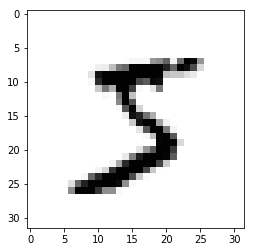

In [76]:
plt.imshow(train_data32[0][1], cmap=mpl.cm.Greys)
plt.show()

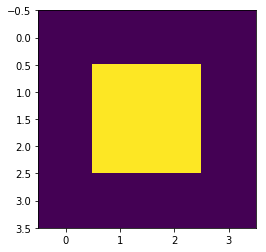

In [69]:
a = np.zeros([4,4])
a[1:3,1:3] = np.ones([2,2])
plt.imshow(a)
plt.show()

In [95]:
tch.FloatTensor(np.zeros(2))


 0
 0
[torch.FloatTensor of size 2]

In [96]:
import PIL
class MNISTLoader(tch.utils.data.Dataset):
    
    def __init__(self, dataset='training', root_dir='.', transform=None):
        if dataset=='training':
            self.fname = os.path.join(root_dir, 'train-images.idx3-ubyte')
            self.flblname = os.path.join(root_dir, 'train-labels.idx1-ubyte')
        elif dataset=='testing':
            self.fname = os.path.join(root_dir, 't10k-images.idx3-ubyte')
            self.flblname = os.path.join(root_dir, 't10k-labels.idx1-ubyte')
        else:
            print('dataset must be either training or testing')
        self.transform = transform
        
        with open(self.flblname, 'rb') as flbl:
            magic, num = struct.unpack(">II", flbl.read(8))
            self.lbl = np.fromfile(flbl, dtype=np.uint8)
        with open(self.fname, 'rb') as fimg:
            magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
            self.img28 = np.fromfile(fimg, dtype=np.uint8).reshape(len(self.lbl), rows, cols)
        self.lbl = tch.LongTensor(self.lbl)
        self.img28 = tch.ByteTensor(self.img28)
            
    def __len__(self):
        if dataset=='training':
            return 60000
        else:
            return 10000
    
    def __getitem__(self, idx):
            img28, target = self.img28[idx], self.lbl[idx]
            img28 = PIL.fromarray

In [90]:
trainData = MNISTLoader(root_dir='./MNIST_data', transform = transforms.Normalize(0.5,1.0))
testData = MNISTLoader(dataset='testing', root_dir='./MNIST_data', transform = transforms.Normalize(0.5,1.0))

In [91]:
testData[1]

TypeError: zip argument #2 must support iteration

In [99]:
tch.autograd.Variable(tch.from_numpy(np.zeros(3)))

Variable containing:
 0
 0
 0
[torch.DoubleTensor of size 3]

In [62]:
batchSize = 128
train_loader = tch.utils.data.DataLoader(dataset=trainData, batch_size=batchSize, shuffle=True, num_workers=1, pin_memory=True)
test_loader = tch.utils.data.DataLoader(dataset=testData, batch_size=batchSize, shuffle=False, num_workers=1, pin_memory=True)

In [51]:
print('==>>> total trainning batch number: {}'.format(len(train_loader)))
print('==>>> total testing batch number: {}'.format(len(test_loader)))

==>>> total trainning batch number: 469
==>>> total testing batch number: 79


In [53]:
#training on cuda
model = LeNet5().cuda()

In [54]:
model.float()

LeNet5 (
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (F6): Linear (120 -> 84)
  (Ou): Linear (84 -> 10)
)

In [97]:
optimizer = optm.SGD(model.parameters(), lr=0.0005, momentum=0.0001)
#print(list(model.parameters()))
for epoch in range(10):
    #training
    for batch_idx, (labels,X) in enumerate(train_loader):
        optimizer.zero_grad()
        labels,X = agd.Variable(labels.cuda()),agd.Variable(X.cuda())
        labels = tch.squeeze(labels)
        #print(batch_idx, X.size())
        outp = model(X)
        #print(list(model.parameters()))
        loss = F.cross_entropy(outp, labels)
        #print(loss)
        loss.backward()
        optimizer.step()
        #print(model.parameters())
        if batch_idx % 100 == 0:
            print('==>>> epoch: {}, batch index: {}, train loss: {:.8f}'.format(epoch, batch_idx, loss.data[0]))

==>>> epoch: 0, batch index: 0, train loss: 2.30258489
==>>> epoch: 0, batch index: 100, train loss: 2.30258489
==>>> epoch: 0, batch index: 200, train loss: 2.30258489
==>>> epoch: 0, batch index: 300, train loss: 2.30258489
==>>> epoch: 0, batch index: 400, train loss: 2.30258489
==>>> epoch: 1, batch index: 0, train loss: 2.30258489
==>>> epoch: 1, batch index: 100, train loss: 2.30258489
==>>> epoch: 1, batch index: 200, train loss: 2.30258489
==>>> epoch: 1, batch index: 300, train loss: 2.30258489
==>>> epoch: 1, batch index: 400, train loss: 2.30258489
==>>> epoch: 2, batch index: 0, train loss: 2.30258489
==>>> epoch: 2, batch index: 100, train loss: 2.30258489
==>>> epoch: 2, batch index: 200, train loss: 2.30258489
==>>> epoch: 2, batch index: 300, train loss: 2.30258489
==>>> epoch: 2, batch index: 400, train loss: 2.30258489
==>>> epoch: 3, batch index: 0, train loss: 2.30258489
==>>> epoch: 3, batch index: 100, train loss: 2.30258489
==>>> epoch: 3, batch index: 200, train

Process Process-70:
Traceback (most recent call last):


KeyboardInterrupt: 

  File "/home/udion/Misc/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/udion/Misc/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/udion/Misc/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/udion/Misc/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-59-ba3e6c8e7970>", line 31, in __getitem__
    return (tch.squeeze(tch.from_numpy(np.array([self.lbl[idx]])).long()), tch.unsqueeze(tch.from_numpy(self.img32[idx]).float(),0))
KeyboardInterrupt
